In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [72]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [4]:
df = pd.read_excel('prepdata.xlsx',index_col=0,parse_dates=True)
df.dropna(axis='columns',inplace=True)

In [5]:
df.head()

,CO1 Comdty,CO2 Comdty,CO3 Comdty,CO4 Comdty,PVMMDS12 Index,PVMMDS23 Index,PVMMD2M3 Index,PVMMD3M4 Index,PVMMDBSP Index,DKI1 Comdty,...,CFCDQORS Index,CFCDPORL Index,CFCDPORS Index,CFCDQPTS Index,CFCDQSWD Index,CFCDPMMD Index,OISTCRDE Index,GBPUSD Curncy,EURUSD Curncy,JPYUSD Curncy
2018-01-02,66.57,66.13,65.79,65.51,0.25,0.25,0.25,0.25,3.08,64.01,...,55237,36753,39940,70,388157,47687,2480,1.3590,1.2059,0.008906
2018-01-03,67.84,67.29,66.90,66.57,0.26,0.26,0.26,0.26,3.36,65.24,...,55237,36753,39940,70,388157,47687,2526,1.3516,1.2015,0.008888
2018-01-04,68.07,67.51,67.11,66.77,0.29,0.29,0.29,0.29,3.34,65.30,...,55237,36753,39940,70,388157,47687,2539,1.3551,1.2068,0.008869
2018-01-05,67.62,67.10,66.73,66.41,0.28,0.26,0.28,0.26,3.29,64.93,...,55237,36753,39940,70,388157,47687,2539,1.3571,1.2029,0.008844
2018-01-08,67.78,67.31,66.95,66.64,0.26,0.24,0.26,0.24,3.24,65.09,...,55237,36753,39940,70,388157,47687,2538,1.3568,1.1967,0.008842


In [78]:
t_index = np.asarray(df.index.tolist(),dtype=np.datetime64)
y1 = np.asarray(df['PVMPGDM1 Index'].tolist(),dtype=np.float64)
y2 = np.asarray(df['PVMPGDM2 Index'].tolist(),dtype=np.float64)

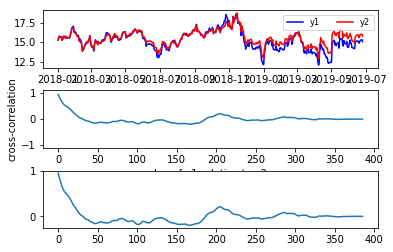

Cross correlate coefficient
Formula calculation : 0.9447963413895923
Using correlate function :  0.9447963413895918
Numpy :  0.9447963413895921
MSE:  0.26905777202072534
RMSE:  0.5187077905918951


In [107]:
def crocor(x,y):
 npts = len(x)
 lags = np.arange(0, npts)
 # Cross covariance
 ccov = np.correlate((y1 - y1.mean()), y2 - y2.mean(), mode='full')
 # Cross correlation coefficient
 ccor = ccov / (y1.std() * y2.std() * npts)
 return (ccor, lags)
 
# ################3
# Cross correlation coefficient by user defined function
# numpy.correlate (Cross correlate) calculates the similarity
# between two vectors/signals as a function of lag
# Seems it's wrong
pcc = np.correlate( (y1-y1.mean())/np.std(y1)/len(y1) , (y2-y2.mean())/np.std(y2) , mode='full')

# Plot
ccor, lags = crocor(y1,y2)
fig, axs = plt.subplots(nrows=3)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(t_index, y1, 'b', label='y1')
ax.plot(t_index, y2, 'r', label='y2')
#ax.set_ylim(50,90)
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor[385:])

ax.set_ylim(-1.1, 1.1)
#ax.set_xlim(0,400)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of y1 relative to y2')

ax = axs[2]
ax.plot(lags,pcc[385:])

maxlag = lags[np.argmax(ccor)]
# print("max correlation is at lag %d" % maxlag)
# print(np.argmax(ccor))
plt.show()


# ############################
# Cross correlation coefficient according to the formula
# In signal processing ,
# numpy.correlate (Cross correlate) calculates the similarity between two vectors/signals
# as a function of lag
aa = np.cov(y1,y2, bias=True) # Without the option 'bias=True', numpy.cov calculates the sample covariance
print('Cross correlate coefficient')
print('Formula calculation :', (aa[0][1]/(y1.std() * y2.std()) ))
print('Using correlate function : ', np.max(ccor))
print('Numpy : ', np.max(pcc))

# #######################
# Mean Square Error
mse = ((y1-y2)**2).sum() / len(y1)
# Root Mean Square Error
rmse = math.sqrt(mse)
print('MSE: ', mse)
# RMSE by numpy
print('RMSE: ' , np.sqrt(np.mean((y1-y2)**2)) )